### Loss function and metrics analysis for training and validation

The Dice Loss and Jaccard Index doesn't work with a void mask. Therefore, we have to find a solution to this problem.

Tackle the problem described in fix_IoU_and_loss_correlation.ipynb 

Confusion matrix:\
Dice Loss:\
Jaccard Index:


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torchmetrics.classification import BinaryJaccardIndex
from torchmetrics.classification import Dice
import segmentation_models_pytorch as smp
import torch
import torch.nn as nn

In [3]:
gt = np.zeros((3, 3))
gt[1, 1] = 1

print("Ground-Truth-Array:")
print(gt)

Ground-Truth-Array:
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


In [4]:
pred = np.copy(gt)
pred[0, 0] = 0

print("Prediction:")
print(pred)

Prediction:
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


In [5]:
pred_off = np.copy(gt)  
pred_off[0, 1] = 1
pred_off_tensor = torch.from_numpy(pred_off)

In [6]:
pred_beside = np.copy(gt)
pred_beside[1, 1] = 0
pred_beside[0, 1] = 1
pred_beside_tensor = torch.from_numpy(pred_beside)

In [7]:
pred_tensor = torch.from_numpy(pred)
gt_tensor = torch.from_numpy(gt)

In [8]:
metric = BinaryJaccardIndex()
loss_fn = smp.losses.DiceLoss(mode="binary", log_loss=False, from_logits=False)

In [9]:
IoU = metric(pred_tensor, gt_tensor).cpu().numpy()
dice_loss = loss_fn(pred_tensor, gt_tensor).cpu().numpy()
print("IoU:", IoU)
print("Dice Loss:", dice_loss)

IoU: 1.0
Dice Loss: 0.0


In [10]:
void_gt = np.zeros((3, 3))
void_gt_tensor = torch.from_numpy(void_gt)

viod_pred = np.copy(void_gt)
viod_pred_tensor = torch.from_numpy(viod_pred)

In [11]:
all_pred = np.ones((3, 3))
all_pred[0, 0] = 0
all_pred_tensor = torch.from_numpy(all_pred)

In [12]:
all_pred_tensor

tensor([[0., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [13]:
void_gt.astype(np.int8)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int8)

In [14]:
IoU = metric(viod_pred_tensor, void_gt_tensor).cpu().numpy()
dice_metric = Dice(mode="binary", zero_division=1)
dice_loss = loss_fn(viod_pred_tensor, void_gt_tensor).cpu().numpy()
dice_coefficient = dice_metric(viod_pred_tensor, void_gt_tensor.to(torch.int8)).cpu().numpy()
print("IoU:", IoU)
print("Dice Loss:", dice_loss)
print("Dice Coefficient:", dice_coefficient)

IoU: nan
Dice Loss: 0.0
Dice Coefficient: 1.0


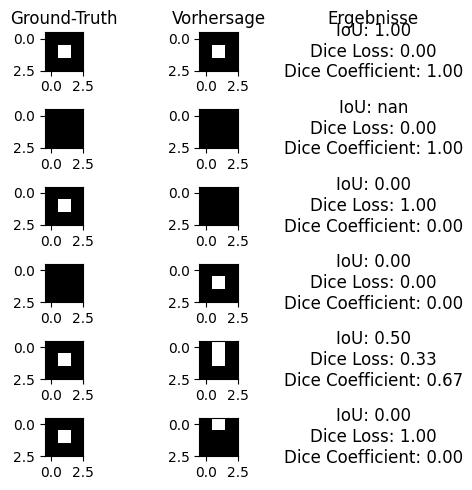

In [15]:
fig, axs = plt.subplots(6, 3, figsize=(5, 5))
axs[0, 0].imshow(gt_tensor.squeeze().cpu().numpy(), cmap='gray')
axs[0, 0].set_title('Ground-Truth')
axs[0, 1].imshow(pred_tensor.squeeze().cpu().numpy(), cmap='gray')
IoU = metric(pred_tensor, gt_tensor).cpu().numpy()
dice_loss = loss_fn(pred_tensor,  gt_tensor).cpu().numpy()
dice_coefficient = dice_metric(pred_tensor, gt_tensor.to(torch.int8)).cpu().numpy()
axs[0, 1].set_title('Vorhersage')
axs[0, 2].text(0.5, 0.5, f'IoU: {IoU:.2f}\nDice Loss: {dice_loss:.2f}\nDice Coefficient: {dice_coefficient:.2f}', fontsize=12, ha='center', va='center')
axs[0, 2].axis('off')
axs[0, 2].set_title('Ergebnisse')

axs[1, 0].imshow(void_gt_tensor.squeeze().cpu().numpy(), cmap='gray')
axs[1, 1].imshow(viod_pred_tensor.squeeze().cpu().numpy(), cmap='gray')
IoU = metric(viod_pred_tensor, void_gt_tensor).cpu().numpy()
dice_loss = loss_fn(viod_pred_tensor, void_gt_tensor).cpu().numpy()
dice_coefficient = dice_metric(viod_pred_tensor, void_gt_tensor.to(torch.int8)).cpu().numpy()
axs[1, 2].text(0.5, 0.5, f'IoU: {IoU:.2f}\nDice Loss: {dice_loss:.2f}\nDice Coefficient: {dice_coefficient:.2f}', fontsize=12, ha='center', va='center')
axs[1, 2].axis('off')

axs[2, 0].imshow(gt_tensor.squeeze().cpu().numpy(), cmap='gray')
axs[2, 1].imshow(viod_pred_tensor.squeeze().cpu().numpy(), cmap='gray')
IoU = metric(viod_pred_tensor, gt_tensor).cpu().numpy()
dice_loss = loss_fn(viod_pred_tensor, gt_tensor).cpu().numpy()
dice_coefficient = dice_metric(viod_pred_tensor, gt_tensor.to(torch.int8)).cpu().numpy()
axs[2, 2].text(0.5, 0.5, f'IoU: {IoU:.2f}\nDice Loss: {dice_loss:.2f}\nDice Coefficient: {dice_coefficient:.2f}', fontsize=12, ha='center', va='center')
axs[2, 2].axis('off')

axs[3, 0].imshow(void_gt_tensor.squeeze().cpu().numpy(), cmap='gray')
axs[3, 1].imshow(pred_tensor.squeeze().cpu().numpy(), cmap='gray')
IoU = metric(pred_tensor, void_gt_tensor).cpu().numpy()
dice_loss = loss_fn(pred_tensor, void_gt_tensor).cpu().numpy()
dice_coefficient = dice_metric(pred_tensor, void_gt_tensor.to(torch.int8)).cpu().numpy()
axs[3, 2].text(0.5, 0.5, f'IoU: {IoU:.2f}\nDice Loss: {dice_loss:.2f}\nDice Coefficient: {dice_coefficient:.2f}', fontsize=12, ha='center', va='center')
axs[3, 2].axis('off')
  
axs[4, 0].imshow(gt_tensor.squeeze().cpu().numpy(), cmap='gray')
axs[4, 1].imshow(pred_off_tensor.squeeze().cpu().numpy(), cmap='gray')
IoU = metric(pred_off_tensor, gt_tensor).cpu().numpy()
dice_loss = loss_fn(pred_off_tensor, gt_tensor).cpu().numpy()
dice_coefficient = dice_metric(pred_off_tensor, gt_tensor.to(torch.int8)).cpu().numpy()
axs[4, 2].text(0.5, 0.5, f'IoU: {IoU:.2f}\nDice Loss: {dice_loss:.2f}\nDice Coefficient: {dice_coefficient:.2f}', fontsize=12, ha='center', va='center')
axs[4, 2].axis('off')

axs[5, 0].imshow(gt_tensor.squeeze().cpu().numpy(), cmap='gray')
axs[5, 1].imshow(pred_beside_tensor.squeeze().cpu().numpy(), cmap='gray')
IoU = metric(pred_beside_tensor, gt_tensor).cpu().numpy()
dice_loss = loss_fn(pred_beside_tensor, gt_tensor).cpu().numpy()
dice_coefficient = dice_metric(pred_beside_tensor, gt_tensor.to(torch.int8)).cpu().numpy()
axs[5, 2].text(0.5, 0.5, f'IoU: {IoU:.2f}\nDice Loss: {dice_loss:.2f}\nDice Coefficient: {dice_coefficient:.2f}', fontsize=12, ha='center', va='center')
axs[5, 2].axis('off')
# tight_layout() sorgt dafür, dass die Plots nicht überlappen
plt.tight_layout()
plt.show()

In [24]:
def show_mask(mask, ax=ax, title=None, show_axis=False):
    ax.imshow(mask.squeeze().cpu().numpy(), cmap='jet')
    if title is not None:
        ax.set_title(title)
    if not show_axis:
        ax.axis('off')

In [31]:
def show_losses(pred, gt, ax=ax, title=None, text_color='black'):
    dice_loss = loss_fn(pred, gt).cpu().numpy()
    bce_loss = nn.BCELoss()
    bce = bce_loss(pred, gt).cpu().numpy()
    ax.text(0.5, 0.5, f'Dice: {dice_loss:.2f}\nBCE: {bce:.2f}', fontsize=12, ha='center', va='center', color=text_color)
    if title is not None:
        ax.set_title(title)
    ax.axis('off')

In [39]:
def show_metrics(pred, gt, ax=ax, title=None, text_color='black'):
    dice_coefficient = dice_metric(pred, gt.to(torch.int8)).cpu().numpy()
    IoU = metric(pred, gt).cpu().numpy()
    ax.text(0.5, 0.5, f'Dice Coef: {dice_coefficient:.2f}\n IoU: {IoU:.2f}' , fontsize=12, ha='center', va='center', color=text_color)
    if title is not None:
        ax.set_title(title)
    ax.axis('off')

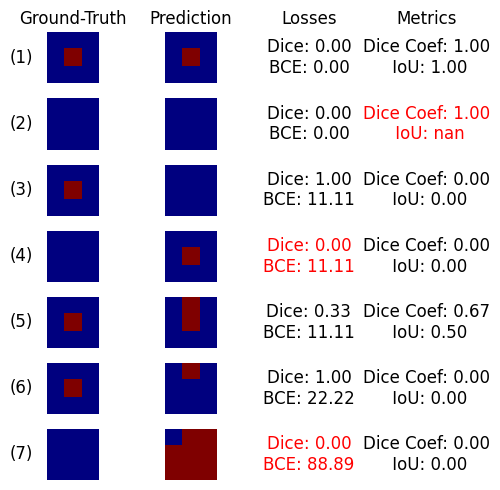

In [40]:
fig, axs = plt.subplots(7, 4, figsize=(5, 5))
ax11, ax12, ax13, ax14 = axs[0]
ax21, ax22, ax23, ax24 = axs[1]
ax31, ax32, ax33, ax34 = axs[2]
ax41, ax42, ax43, ax44 = axs[3]
ax51, ax52, ax53, ax54 = axs[4]
ax61, ax62, ax63, ax64 = axs[5]
ax71, ax72, ax73, ax74 = axs[6]

show_mask(mask=gt_tensor, ax=ax11, title='Ground-Truth')
show_mask(mask=pred_tensor, ax=ax12, title='Prediction')
show_losses(pred=pred_tensor, gt=gt_tensor, ax=ax13, title='Losses')
show_metrics(pred=pred_tensor, gt=gt_tensor, ax=ax14, title='Metrics')
ax11.text(-2, 1, '(1)', fontsize=12, ha='center', va='center')

show_mask(mask=void_gt_tensor, ax=ax21)
show_mask(mask=viod_pred_tensor, ax=ax22)
show_losses(pred=viod_pred_tensor, gt=void_gt_tensor, ax=ax23)
show_metrics(pred=viod_pred_tensor, gt=void_gt_tensor, ax=ax24, text_color='red')
ax21.text(-2, 1, '(2)', fontsize=12, ha='center', va='center')

show_mask(mask=gt_tensor, ax=ax31)
show_mask(mask=viod_pred_tensor, ax=ax32)
show_losses(pred=viod_pred_tensor, gt=gt_tensor, ax=ax33)
show_metrics(pred=viod_pred_tensor, gt=gt_tensor, ax=ax34)
ax31.text(-2, 1, '(3)', fontsize=12, ha='center', va='center')

show_mask(mask=void_gt_tensor, ax=ax41)
show_mask(mask=pred_tensor, ax=ax42)
show_losses(pred=pred_tensor, gt=void_gt_tensor, ax=ax43, text_color='red')
show_metrics(pred=pred_tensor, gt=void_gt_tensor, ax=ax44)
ax41.text(-2, 1, '(4)', fontsize=12, ha='center', va='center')

show_mask(mask=gt_tensor, ax=ax51)
show_mask(mask=pred_off_tensor, ax=ax52)
show_losses(pred=pred_off_tensor, gt=gt_tensor, ax=ax53)
show_metrics(pred=pred_off_tensor, gt=gt_tensor, ax=ax54)
ax51.text(-2, 1, '(5)', fontsize=12, ha='center', va='center')

show_mask(mask=gt_tensor, ax=ax61)
show_mask(mask=pred_beside_tensor, ax=ax62)
show_losses(pred=pred_beside_tensor, gt=gt_tensor, ax=ax63)
show_metrics(pred=pred_beside_tensor, gt=gt_tensor, ax=ax64)
ax61.text(-2, 1, '(6)', fontsize=12, ha='center', va='center')

show_mask(mask=void_gt_tensor, ax=ax71)
show_mask(mask=all_pred_tensor, ax=ax72)
show_losses(pred=all_pred_tensor, gt=void_gt_tensor, ax=ax73, text_color='red')
show_metrics(pred=all_pred_tensor, gt=void_gt_tensor, ax=ax74)
ax71.text(-2, 1, '(7)', fontsize=12, ha='center', va='center')
fig.tight_layout()

In [57]:
fig.savefig('figures/losses_metrics_eng.pdf', bbox_inches='tight' )
fig.savefig('figures/losses_metrics_eng.svg', bbox_inches='tight' )